In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Salary_Data.csv')

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
data = data.rename(columns = {'YearsExperience' : 'yearsexp', 'Salary':'salary'})

In [13]:
data

,yearsexp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   yearsexp  30 non-null     float64
 1   salary    30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [15]:
#correlation
data.corr()

,yearsexp,salary
yearsexp,1.000000,0.978242
salary,0.978242,1.000000


In [17]:
import seaborn as sn

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearsexp', ylabel='Density'>

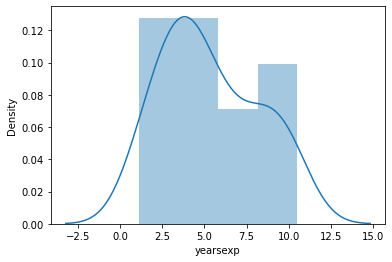

In [19]:
sn.distplot(data['yearsexp'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

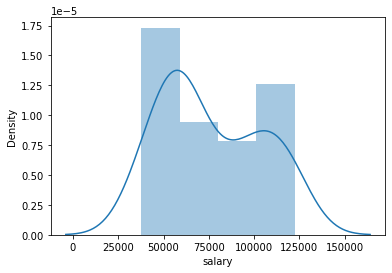

In [20]:
sn.distplot(data['salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22a96a0f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22a96a1d0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a96a0f670>],
 'medians': [<matplotlib.lines.Line2D at 0x22a96a1d790>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a96a1daf0>],
 'means': []}

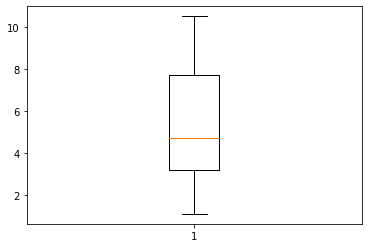

In [22]:
plt.boxplot(data.yearsexp)

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

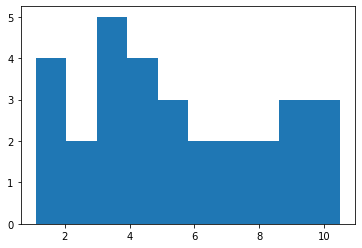

In [29]:
plt.hist(data.yearsexp, bins=10)

In [30]:
#prediction for new model

In [31]:
#fitting yearsexperience and salary together
import statsmodels.formula.api as smf
model=smf.ols('yearsexp~salary',data=data).fit()

<AxesSubplot:xlabel='yearsexp', ylabel='salary'>

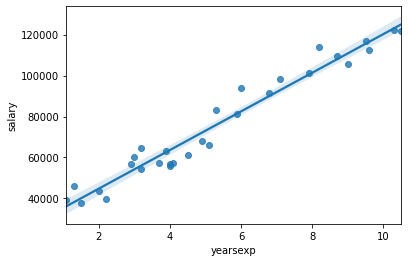

In [34]:
sn.regplot(x="yearsexp",y="salary",data=data)

In [35]:
#coefficients
model.params

Intercept   -2.383161
salary       0.000101
dtype: float64

In [36]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept    -7.281283
salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
salary       1.143068e-20
dtype: float64


In [37]:
#r squared values
print(model.rsquared,model.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               yearsexp   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.14e-20
Time:                        17:08:36   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""